In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install opencv-python

In [1]:
from glob import glob
data = glob('/kaggle/input/**/*.png', recursive=True)

In [3]:
import cv2
import matplotlib.pyplot as plt

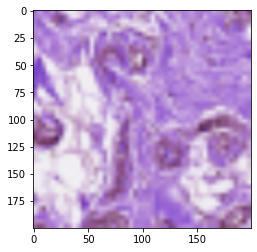

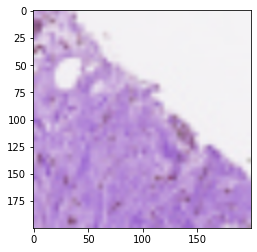

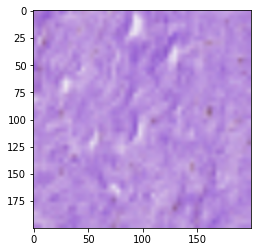

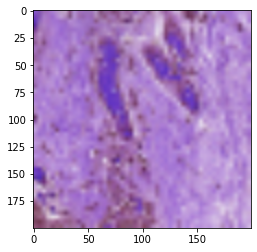

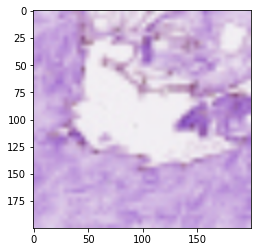

In [3]:
for i in data[:5]:
    img = cv2.imread(i)
    img_1 = cv2.resize(img,(200,200))
    plt.imshow(img_1,cmap='binary')
    plt.show()

In [4]:
images=[]
labels=[]
for i in data[:20000]:
    if i.endswith('.png'):
        label=i[-5]
        img=cv2.imread(i)
        img_1=cv2.resize(img,(100,100))
        images.append(img_1)
        labels.append(label)

In [5]:
import numpy as np
x = np.stack(images)

In [6]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(labels)

In [7]:
# Normalizing the data
x=x/255

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
# 3000 test sample
# 4800 validation sample
# 7200 train sample

In [10]:
import gc
gc.collect()

22

In [11]:
del x, y, data
gc.collect()

22

In [19]:
gc.collect()

44

In [12]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers

In [13]:
model = models.Sequential()
model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2, activation = "sigmoid"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb0 (Functional)  (None, 4, 4, 1280)        4049571   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 4,052,133
Trainable params: 4,010,110
Non-trainable params: 42,023
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def first_simple():
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    return model

def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model = first_simple()
model.summary()

In [15]:
from keras.optimizers import Adam
opt = Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])

In [22]:
del data

In [23]:
gc.collect()

1689

In [16]:
history = model.fit(x_train,y_train,
                    epochs=50,
                    steps_per_epoch=100,
                    validation_split=0.4,
                    batch_size=56,
                    validation_steps=20)

Epoch 1/50
100/100 [==============================] - 33s 145ms/step - loss: 0.6704 - acc: 0.6171 - val_loss: 0.7105 - val_acc: 0.3679
Epoch 2/50
100/100 [==============================] - 12s 119ms/step - loss: 0.5365 - acc: 0.7989 - val_loss: 0.6721 - val_acc: 0.6411
Epoch 3/50
100/100 [==============================] - 11s 111ms/step - loss: 0.4562 - acc: 0.8253 - val_loss: 0.6824 - val_acc: 0.6411
Epoch 4/50
100/100 [==============================] - 11s 112ms/step - loss: 0.4030 - acc: 0.8459 - val_loss: 0.7735 - val_acc: 0.6393
Epoch 5/50
100/100 [==============================] - 11s 114ms/step - loss: 0.3797 - acc: 0.8521 - val_loss: 0.7972 - val_acc: 0.6366
Epoch 6/50
100/100 [==============================] - 11s 111ms/step - loss: 0.3608 - acc: 0.8521 - val_loss: 0.9269 - val_acc: 0.6411
Epoch 7/50
100/100 [==============================] - 11s 111ms/step - loss: 0.3332 - acc: 0.8704 - val_loss: 0.6847 - val_acc: 0.6491
Epoch 8/50
100/100 [==============================] - 1

In [17]:
# Test results of the Modle on train and test data
loss_train,accuracy_train = model.evaluate(x_train, y_train)
print('Model has an accuracy of {} with a loss of {} on the train subset.'.format(accuracy_train,loss_train ))

500/500 [==============================] - 12s 19ms/step - loss: 0.2027 - acc: 0.9265
Model has an accuracy of 0.9265000224113464 with a loss of 0.20267254114151 on the train subset.


In [18]:
del x_train, y_train
gc.collect()

2226

In [19]:
loss_test,accuracy_test = model.evaluate(x_test, y_test)
print('Model has an accuracy of {} with a loss of {} on the test subset.'.format(accuracy_test,loss_test))

125/125 [==============================] - 2s 18ms/step - loss: 0.3483 - acc: 0.8767
Model has an accuracy of 0.8767499923706055 with a loss of 0.3483041822910309 on the test subset.


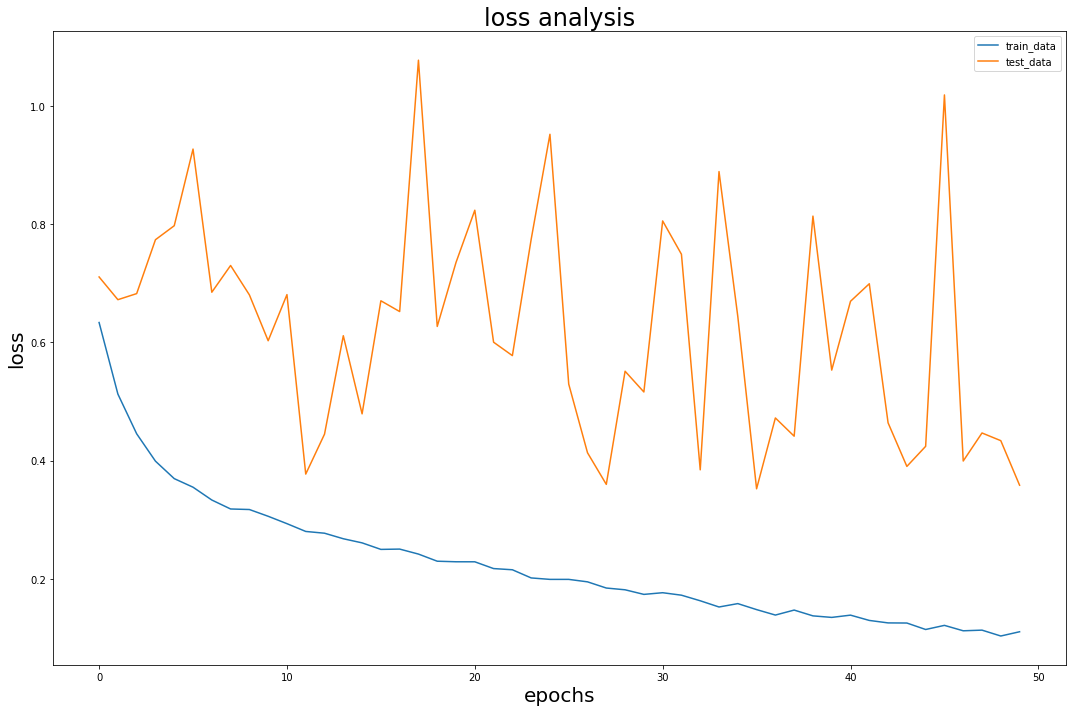

In [26]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('epochs',size=20)
ax.set_ylabel('loss',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('loss analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_loss.png')

plt.show()

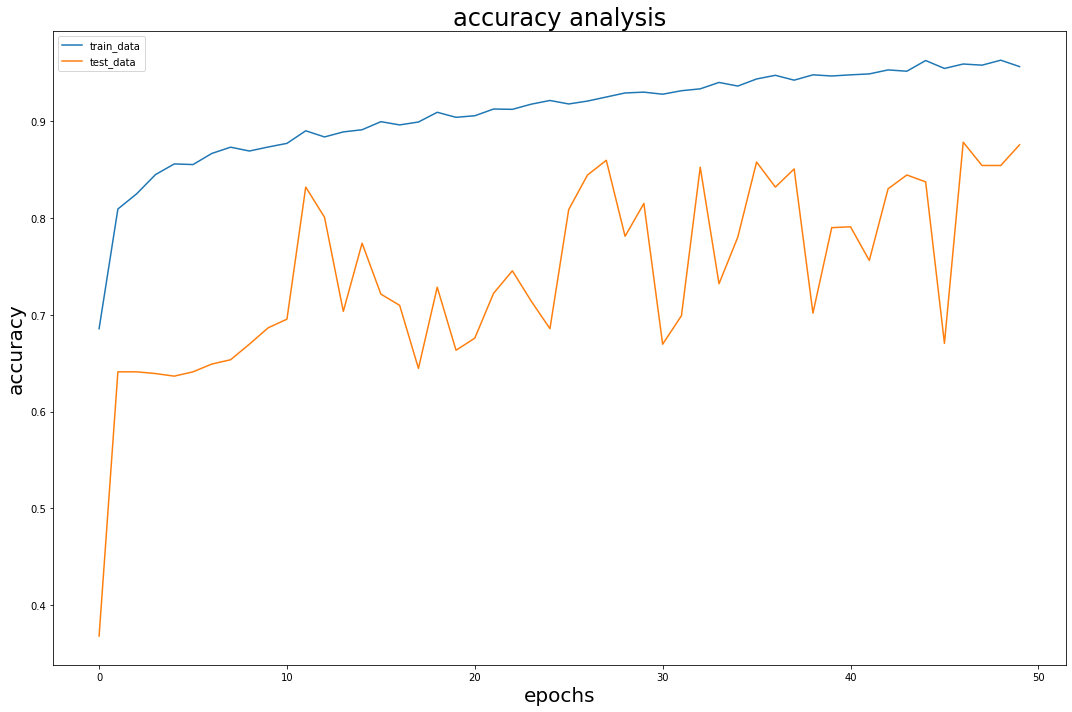

In [25]:
fig,ax = plt.subplots(figsize=(15,10))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
ax.set_xlabel('epochs',size = 20)
ax.set_ylabel('accuracy',size = 20)
ax.legend(['train_data','test_data'])
ax.set_title('accuracy analysis',size = 24)
plt.tight_layout()
fig.savefig('effNetB0_acc.png')
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
def first_simple():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(100, 100, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    return model

def modelEfficientNetB0():
    
    model = models.Sequential()
    model.add(EfficientNetB0(include_top = False, weights = "imagenet",
                            input_shape=(100,100, 3)))
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(2, activation = "sigmoid"))
    
    return model 
model2 = modelEfficientNetB0()
model2.summary()